In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import sklearn
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('completereview.csv',low_memory=False, index_col=0)
df = df.reset_index(drop=True)

In [ ]:
df # social, information, fairness

In [ ]:
df.columns

In [5]:
df = df.drop(columns = ['id','title','landlord_id','updated_at','body','visible','author_type','email','flagged','best_thing','worst_thing','cached_votes_score','cached_votes_up','cached_votes_down','cached_weighted_total','cached_weighted_average','deposit','complete'])

In [ ]:
df.columns

In [7]:
df = df.drop(columns = ['college_id','deposit_jusitified','created_at','cached_votes_total','cached_weighted_score', 'lease','rent'])


In [8]:
df.columns

Index(['score', 'condition', 'responsiveness', 'respect', 'information',
       'fairness', 'safety', 'recommend', 'author_id', 'pests', 'social'],
      dtype='object')

In [9]:
df = df.drop(['author_id'], axis=1)

In [10]:
df = df.drop(['fairness'],axis=1)

In [11]:
df.columns

Index(['score', 'condition', 'responsiveness', 'respect', 'information',
       'safety', 'recommend', 'pests', 'social'],
      dtype='object')

In [12]:
rec_map = {False: 0, True: 1}

df = df.replace({'recommend': rec_map})


In [13]:
df = sklearn.utils.shuffle(df)
X = df.drop(['recommend'], axis=1)
y = df['recommend']

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [15]:
X.shape

(15018, 8)

In [16]:
y = np.array(y)

In [17]:
y

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=32, test_size=0.2)

In [19]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [20]:
X_train.shape

(12014, 8)

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001),
             loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
m = model.fit(X_train, y_train, validation_split=0.15, epochs=60, batch_size=62)

Epoch 1/60
165/165 [==============================] - 0s 1ms/step - loss: 0.6337 - accuracy: 0.6427 - val_loss: 0.5813 - val_accuracy: 0.7299
Epoch 2/60
165/165 [==============================] - 0s 544us/step - loss: 0.5388 - accuracy: 0.7487 - val_loss: 0.5341 - val_accuracy: 0.7410
Epoch 3/60
165/165 [==============================] - 0s 574us/step - loss: 0.5118 - accuracy: 0.7553 - val_loss: 0.5219 - val_accuracy: 0.7488
Epoch 4/60
165/165 [==============================] - 0s 549us/step - loss: 0.5025 - accuracy: 0.7611 - val_loss: 0.5154 - val_accuracy: 0.7587
Epoch 5/60
165/165 [==============================] - 0s 550us/step - loss: 0.4969 - accuracy: 0.7653 - val_loss: 0.5113 - val_accuracy: 0.7593
Epoch 6/60
165/165 [==============================] - 0s 520us/step - loss: 0.4933 - accuracy: 0.7674 - val_loss: 0.5071 - val_accuracy: 0.7610
Epoch 7/60
165/165 [==============================] - 0s 543us/step - loss: 0.4899 - accuracy: 0.7721 - val_loss: 0.5062 - val_accuracy: 0

In [24]:
print('test score:',model.evaluate(X_test, y_test))

94/94 [==============================] - 0s 351us/step - loss: 0.4466 - accuracy: 0.8086
test score: [0.44660407304763794, 0.8085885643959045]


In [25]:
y_pred = model.predict(X_test)

y_pred = (y_pred > 0.5)

In [26]:
print(y_pred)

[[ True]
 [False]
 [False]
 ...
 [ True]
 [ True]
 [False]]


In [27]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [0 0]]


In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1181  321]
 [ 254 1248]]


0.8085885486018641

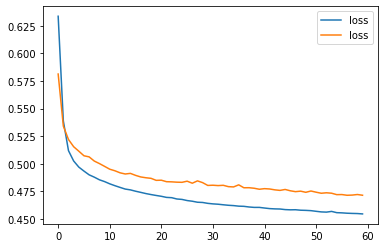

In [29]:
plt.plot(m.history['loss'], label='loss')
plt.plot(m.history['val_loss'],label='loss')
plt.legend()

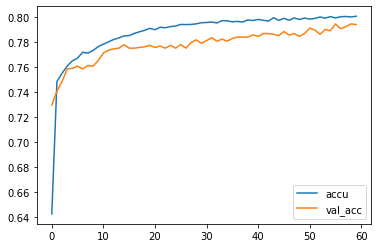

In [30]:
plt.plot(m.history['accuracy'],label='accu')
plt.plot(m.history['val_accuracy'], label='val_acc')
plt.legend()

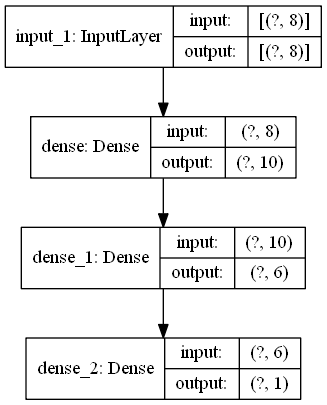

In [31]:
from keras.utils import plot_model

tf.keras.utils.plot_model(model, to_file='tesnor3.png', show_shapes=True, show_layer_names=True)
